In [2]:
import sklearn

Download dataset(IMDB Movie Reviews) from kaggle

In [3]:
from google.colab import files
import os

# upload kaggle api token by uploading the file downloaded from kaggle
print("Please upload your kaggle.json file:")
uploaded = files.upload()

if 'kaggle.json' in uploaded:
    print("\n'kaggle.json' uploaded successfully")

    # CONFIGURE KAGGLE
    !mkdir -p ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
    print("Kaggle API configured.")

    # DOWNLOAD THE DATASET
    print("\nDownloading the IMDb dataset.")
    !kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

    print("\nUnzipping the dataset.")
    # The '-q' flag makes the unzip process quiet.
    !unzip -q imdb-dataset-of-50k-movie-reviews.zip

else:
    print("\nUpload failed")

Please upload your kaggle.json file:


Saving kaggle.json to kaggle.json

'kaggle.json' uploaded successfully
Kaggle API configured.

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
  0% 0.00/25.7M [00:00<?, ?B/s]
100% 25.7M/25.7M [00:00<00:00, 1.06GB/s]

Unzipping the dataset.


Importing the dataset into the project using pandas

In [4]:
import pandas as pd

df=pd.read_csv("IMDB Dataset.csv")
print(df.head)
print(df.shape)
print(df['sentiment'].value_counts)

<bound method NDFrame.head of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>
(50000, 2)
<bound method IndexOpsMixin.value_counts of 0        positive
1        positive
2        positive
3        negative
4        pos

Mapping the sentiments positive and negative to 1 and 0 respectively

In [5]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
print("Data after label encoding: ")
display(df.head())

Data after label encoding: 


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


Define review as feature and sentiment as target

In [6]:
X = df['review']

y = df['sentiment']

Splitting dataset into training and test set

In [7]:
from sklearn.model_selection import train_test_split

# test_size=0.2 so that 20% of the data is for testing
# random_state=42 ensures we get the same split every time we run this
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {X_train.shape[0]} reviews")
print(f"Testing data size: {X_test.shape[0]} reviews")

Training data size: 40000 reviews
Testing data size: 10000 reviews


Vectorizing the text(specifically features) with TF-IDF. Im directly using fit transform here.
Training, testing, evaluating model and creating confusion matrix for model Multinomial Naive Bayes

Training the Naive Bayes Pipeline
Training done

 Making predictions on the test set

 Model Evaluation 
Accuracy with TF-IDF: 86.35%

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      4961
           1       0.88      0.84      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


 Generating Confusion Matrix


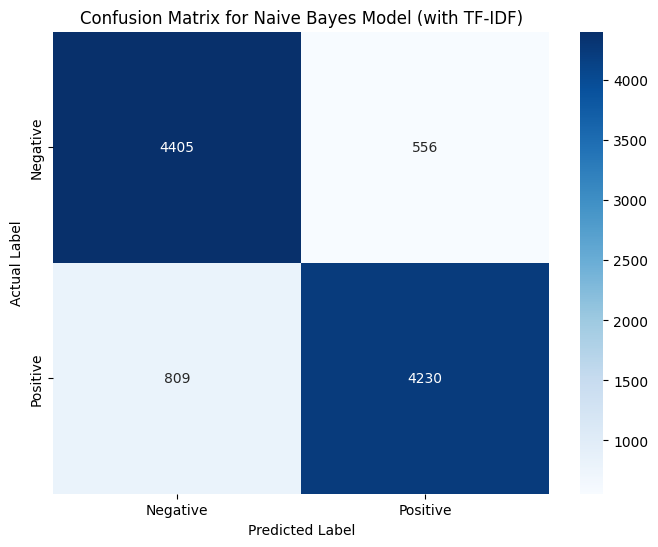

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Define the structure of pipeline
# It contains two steps: the vectorizer and the classifier.
pipeline_naive_bayes = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB()),
])


# Train entire pipeline on the raw training data (X_train, y_train)
# The pipeline will automatically handle calling .fit_transform() on the vectorizer and then passing the results to the model's .fit() method.
print("Training the Naive Bayes Pipeline")
pipeline_naive_bayes.fit(X_train, y_train)
print("Training done")

print("\n Making predictions on the test set")
predictions = pipeline_naive_bayes.predict(X_test)

print("\n Model Evaluation ")
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy with TF-IDF: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, predictions))

print("\n Generating Confusion Matrix")

cm = confusion_matrix(y_test, predictions)

# Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

# labels for the matrix
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Naive Bayes Model (with TF-IDF)')

plt.show()

Defining pipeline with SVM(Support Vector Machines),training it with N-grams(for better results) and evaluating it

In [15]:
from sklearn.svm import LinearSVC

# Define the steps for the pipeline
pipeline_svm_ngrams = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=20000)),
    ('clf', LinearSVC()),
])

print("Training the SVM Pipeline with N-grams")
pipeline_svm_ngrams.fit(X_train, y_train)

# Evaluate the SVM pipeline
print("\n Evaluating the SVM pipeline")
predictions_svm = pipeline_svm_ngrams.predict(X_test)

print(f"Accuracy with SVM and N-grams: {accuracy_score(y_test, predictions_svm) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, predictions_svm))

Training the SVM Pipeline with N-grams

 Evaluating the SVM pipeline
Accuracy with SVM and N-grams: 90.74%

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      4961
           1       0.90      0.91      0.91      5039

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Creating confusion matrix for svm model

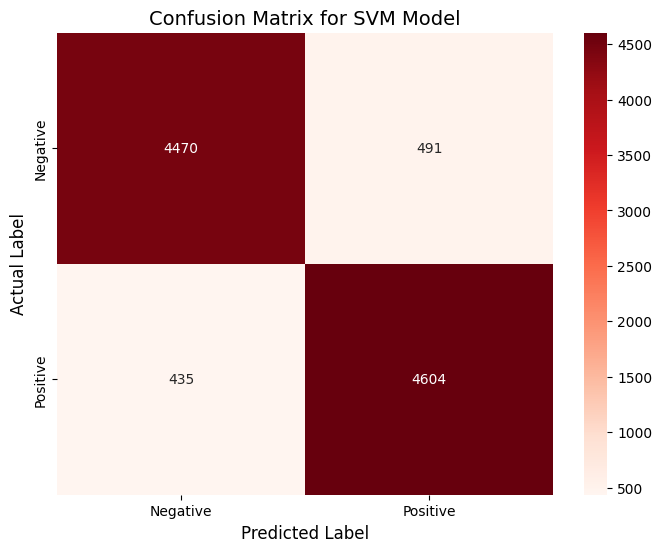

In [16]:

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions_svm)
plt.figure(figsize=(8, 6))

# `sns.heatmap` is used to create a heatmap visualization
# `annot=True` writes the numbers inside the squares
# `fmt='d'` formats the numbers as integers
# `cmap='Blues'` sets the color scheme
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.title('Confusion Matrix for SVM Model', fontsize=14)

plt.savefig('confusion_matrix.png')

Exporting the model

In [11]:
import joblib

model_to_save = pipeline_svm_ngrams

# filename for the model
model_filename = 'sentiment_analysis_model.joblib'

print(f"Saving model to {model_filename}...")
joblib.dump(model_to_save, model_filename)
print("Model saved successfully!")

Saving model to sentiment_analysis_model.joblib...
Model saved successfully!
